# Рекомендательные системы

### Простые user2user рекомендации

Предположим у нас есть некий блог про ИТ и анализ данных, у него есть система тегов по темам. 
Есть набор пользователей и темы, которые они уже читают, необходимо порекомендовать им новые

In [31]:
import datetime

from collections import Counter
from collections import defaultdict

import pickle as pkl
import numpy as np
import scipy.sparse as sps

from scipy import linalg
import matplotlib.pyplot as plt

In [11]:
user_items = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

### Рекомендация наиболее популярного выбора

Давайте попробуем рекомендовать самые популярные теги из тех, что пользователь еще не читает<br>
Для начала составьте список самых популярных тегов 



In [28]:
# Ваш код здесь 
popular_title = Counter([item for sublist in user_items for item in sublist]).most_common()

In [29]:
def popular_recommendation_user(user_id, nums=5):
    ...

In [ ]:
user_id = 0 # id клиента (на самом деле номер строчки)

print('Интересы клиента id{}: {}'.format(user_id, user_items[user_id]))
print('Рекомендации для клиента id{}: {}'.format(user_id, popular_recommendation_user(user_id)))

Выглядит не так плохо, но кажется это связано с тем что контент по одной тематике – фактически мы никак не учитываем интересы пользователя (за исключением последнего шага), для всех пользователей будут одинаковые рекомендации


### Переходим к user2user

Будем рекомендовать A то нравится B, исходя из схожести интересов <br>
– Создадим многомерное пространство тегов <br>
– Отобразим наших пользователей на это пространство<br>
– Найдем похожих <br>
– PROFIT 

In [42]:
# Наше многомерное пространство по сути – список уникальных отсортированных элементов 
unique_items = sorted(set([item for sublist in user_items for item in sublist]))
unique_items[:5]

['Big Data', 'C++', 'Cassandra', 'HBase', 'Hadoop']

In [50]:
def user_to_vector(user_items):
    # ваш код здесь
    ...

In [54]:
user_items_matrix = [user_to_vector(user_items) for user_items in user_items]


In [55]:
print(user_items_matrix)

[[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0,

In [58]:
# Самое время искать похожих юзеров, будем пользоваться косинусной мерой близости
def cosim(v1,v2):
    return np.dot(v1,v2)/ np.sqrt(np.dot(v1,v1)*np.dot(v2,v2))

In [62]:
def similar_users(user_ID):
    # допишите функцию, так чтобы она возвращала список кортежей (id, значение меры), 
    # используейте cosim, определенный до этого
    pairs = []   
    return sorted(pairs, key = lambda x: x[1], reverse =1)

similar_users(0)

[(9, 0.5669467095138409),
 (1, 0.3380617018914066),
 (8, 0.1889822365046136),
 (13, 0.1690308509457033),
 (5, 0.1543033499620919)]

In [67]:
# А теперь наконец можем рекомендовать
def user_user_recommendation(user_ID, nums = 5):
    recommendation = defaultdict(float)
# проходимся по похожим юзерам
    for user_id, cosim_similarity in similar_users(user_ID):
        for interest in user_items[user_id]:
            recommendation[interest] += cosim_similarity
# сортируем рекомендации
    recommendation = sorted(recommendation.items(), key = lambda x: x[1], reverse=1)
# исключаем то что уже есть
    recommendation = [i for i in recommendation if i[0] not in user_items[user_ID]]  
    return recommendation[:nums]

In [68]:
user_id = 0 # id клиента (на самом деле номер строчки)

print('Интересы клиента id{}: {}'.format(user_id, user_items[user_id])) 
print ('---')
print('Рекомендации для клиента id{} из популярного: {}'.format(user_id, popular_recommendation_user(user_id)))
print ('---')
print('User2user рекомендации для клиента id{}: {}'.format(user_id, user_user_recommendation(user_id)))


Интересы клиента id0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
---
Рекомендации для клиента id0 из популярного: [('Python', 4), ('R', 4), ('statistics', 3), ('regression', 3), ('probability', 3)]
---
User2user рекомендации для клиента id0: [('MapReduce', 0.5669467095138409), ('MongoDB', 0.50709255283711), ('Postgres', 0.50709255283711), ('NoSQL', 0.3380617018914066), ('neural networks', 0.1889822365046136)]


## Go deeper & Item2item рекомендации

В этом секции мы применим алгоритм коллаборативной фильтрации на item-base подходе. Работать мы будем с датасетом MovieLens, который содержит в себе информацию об оценках фильмов пользователями одноименного сайта.

Загрузим предобработанные данные.

In [145]:
with open('data.pkl', 'rb') as f:
    data = pkl.load(f)
users = data['users']
movies = data['movies']
ratings = data['ratings']

### Посмотрим на данные

In [159]:
# Посмотрите на количество юзеров и фильмов
...

О пользователях нам известен пол (F, M), возраст, закодированная информация о трудоуствройстве и zip-code.

In [147]:
users[1001]

{'Gender': 'M', 'Age': '50', 'Occupation': 11, 'Zip-code': '07043'}

Про фильм известны название и список жанров.

In [148]:
movies[1001]

{'Title': 'Pollyanna (1960)', 'Genres': ["Children's", 'Comedy', 'Drama']}

В словаре ratings хранится список оценок для каждого пользователя.
Каждая оценка - это кортеж из movieId, самой оценки (числа от 1 до 5) и момента времени, когда оценка была сделана.

In [149]:
print('Number of ratings for user 1001:', len(ratings[1001]))
print(ratings[1001][65])

Number of ratings for user 1001: 66
(1078, 5, datetime.datetime(2000, 12, 9, 6, 48, 24))


Выведем список любимых жанров юзера 1001 

In [157]:
g1001 = defaultdict(int)
for r in ratings[1001]:
    for genre in movies[r[0]]['Genres']:
        g1001[genre] += 1
g1001

defaultdict(int,
            {'Adventure': 4,
             'Animation': 1,
             'Film-Noir': 1,
             'Comedy': 20,
             'Drama': 50,
             'Documentary': 3,
             'Western': 1,
             'Thriller': 5,
             'Sci-Fi': 3,
             'Romance': 8,
             'Action': 7,
             'Crime': 5,
             'War': 5,
             'Mystery': 2,
             'Musical': 1})

### Валидация

Разобьем данные на тренировочную и тестовую выборку. Разбивать будем рейтинги по времени. Для начала найдем дату на которую было выставленно 80% рейтингов в датасете. И все рейтинги, что были до, попадут в train, а остальные в test.

In [76]:
times = []
for user_ratings in ratings:
    times.extend([x[2] for x in user_ratings])

In [77]:
times = sorted(times)

In [78]:
threshold_time = times[int(0.8 * len(times))]

In [79]:
train = []
test = []
for user_id, user_ratings in enumerate(ratings):
    train.extend((user_id, rating[0], rating[1] / 5.0) for rating in user_ratings if rating[2] <= threshold_time)
    test.extend((user_id, rating[0], rating[1] / 5.0) for rating in user_ratings if rating[2] > threshold_time)
print("ratings in train:", len(train))
print("ratings in test:", len(test))

ratings in train: 800168
ratings in test: 200041


In [80]:
train_by_user = defaultdict(list)
test_by_user = defaultdict(list)
for u, i, r in train:
    train_by_user[u].append((i, r))
for u, i, r in test:
    test_by_user[u].append((i, r))

Научимся считать тестовую метрику (MSE) для предсказаний.

In [81]:
def recom_mse(recom_func):
    mse = 0
    cnt = 0
    for uid in range(len(users)):
        recoms = recom_func(uid)
        tbu = test_by_user[uid]
        test_items = [e[0] for e in tbu]
        test_ratings = np.array([e[1] for e in tbu])        
        errors = np.square(recoms[test_items] - test_ratings)
        mse += sum(errors)
        cnt += len(errors)
    return mse / cnt

Посмотрим характерное значение метрики для случайного предсказания.

In [82]:
def random_recom_func(uid):
    return np.random.rand(len(movies))

In [17]:
recom_mse(random_recom_func)

0.17628161122958955

### Item-based коллаборативная фильтрация

Item-based коллаборативная фильтрация это почти как user-based, только item.

В item-based мы считаем похожесть фильмов (столбцов матрицы) и вычисляем оценку пользователя U на фильм I как взвешенное среднее оценок пользователя U на остальные фильмы, где вес - степень похожести на фильм I:
$$ \hat{r}(u_5, i_1) = \sum_{i \in \{3, 4, 5\}} sim(i_1, i) \cdot r(u_5, i) $$
$$ \sum_{i \in \{3, 4, 5\}} sim(i_1, i) = 1 $$

<img src="https://hsto.org/files/827/8c7/4dc/8278c74dce8b45e992220121e8a08ae5.png" width="50%"/>

Сейчас мы хотим посчититать похожесть по фильмам.

Для этого нам сначала нужно посчитать средний рейтинг каждого пользователя (потом мы будем центрировать на него оценки этого пользователя).

In [104]:
user_average = defaultdict(list)
for user, item, rank in train:
    user_average[user].append(rank)
for user in user_average.keys():
    user_average[user] = sum(user_average[user]) / len(user_average[user])
user_average = dict(user_average)

Построим матрицу user-item.

In [106]:
user_item = np.zeros([len(users), len(movies)])
for u, i, r in train:
    # ваш код здесь
    ...

Посчитаем норму (длину) каждого фильма (столбца) в этой матрице, ибо вектор. <br>
Сделаем копию матрицы user-item с нормированными столбцами.

In [119]:
item_norms = (user_item ** 2).sum(0) ** 0.5
user_item_normed = user_item / (item_norms[np.newaxis, :] + 1e-6)

Похожестью фильмов будем считать скалярное произведение их нормированных столбцов.

(Без нормирования популярные фильмы были бы наиболее похожи на все остальные фильмы).

In [120]:
item_item_similarity = user_item_normed.transpose().dot(user_item_normed)

Давайте обнулим те похожести, которые меньше 0. Это означает, что если угол между векторами больше 90 градусов, то мы считаем их совсем не похожими.

In [125]:
item_item_similarity[item_item_similarity <=0] = 0

Напишем функцию, вычисляющую рекомендации для пользователя.

In [135]:
def item_based_recoms(uid):
    user_ratings = train_by_user[uid]
    if len(user_ratings) == 0:
        return np.random.rand(len(movies))
    user_rated_items = [e[0] for e in user_ratings]
    user_rated_ratings = np.array([[e[1]] for e in user_ratings])
    # столбцы в матрице похожести, которые соответствуют оцененным фильмам
    similar_items = item_item_similarity[:, user_rated_items]
    # смешаем пользовательские рейтинги с весами похожести фильмов и таким образом получим предсказанные рейтинги
    recoms = similar_items.dot(user_rated_ratings)[:, 0] / (similar_items.sum(axis=1) + 1e-6)
    return recoms

Посмотрим, какие фильмы рекомендуются пользователю 1001.

In [136]:
recoms1001 = item_based_recoms(1001)
print(recoms1001)

[0.80629559 0.59598739 0.42865171 ... 0.87984804 0.86532725 0.81723548]


In [138]:
top_movies = np.argsort(-recoms1001)
user_1001_rated_items = [e[0] for e in train_by_user[1001]]
top_movies_ids = [i for i in top_movies if i not in user_1001_rated_items][:20]
top_movies_names = [movies[mid]['Title'] for mid in top_movies_ids]
print(top_movies_names)

['Talk of Angels (1998)', 'Time of the Gypsies (Dom za vesanje) (1989)', 'Bittersweet Motel (2000)', 'Beyond Silence (1996)', 'Year of the Horse (1997)', 'Ballad of Narayama, The (Narayama Bushiko) (1958)', 'Midaq Alley (Callejón de los milagros, El) (1995)', 'Silence of the Palace, The (Saimt el Qusur) (1994)', 'Gay Deceivers, The (1969)', 'Detroit 9000 (1973)', 'Modern Affair, A (1995)', '1-900 (1994)', 'Paralyzing Fear: The Story of Polio in America, A (1998)', 'Schlafes Bruder (Brother of Sleep) (1995)', 'Steamboat Willie (1940)', 'Outside Ozona (1998)', 'Broadway Damage (1997)', 'Ulysses (Ulisse) (1954)', 'Naked Man, The (1998)', 'Captives (1994)']


In [139]:
g1001 = defaultdict(int)
for mid in top_movies_ids:
    for genre in movies[mid]['Genres']:
        g1001[genre] += 1
g1001

defaultdict(int,
            {'Drama': 10,
             'Documentary': 3,
             'Comedy': 3,
             'Action': 1,
             'Crime': 1,
             'Romance': 2,
             'Animation': 1,
             "Children's": 1,
             'Musical': 1,
             'Thriller': 1,
             'Adventure': 1})

Видно, что по жанрам предлагаемые фильмы похожи на то, что любит пользователь, хотя информация о жанрах никак не использовалась в модели.

Можем посмотреть на рейтинги в тесте этого пользователя и сравнить с предсказанными.

Посчитаем MSE.

In [30]:
recom_mse(item_based_recoms)

0.10645401112258601

Видим, что результат лучше случайного.

## Бонус-треки

### Cold start problem

Есть новые пользователи, которые пока что не поставили ни одной оценки, есть фильмы (новые или просто унылые), которые пока никто не оценил. Нужно думать что с ними делать.

Все пользователи в датасете сделали хотя бы по 20 оценок


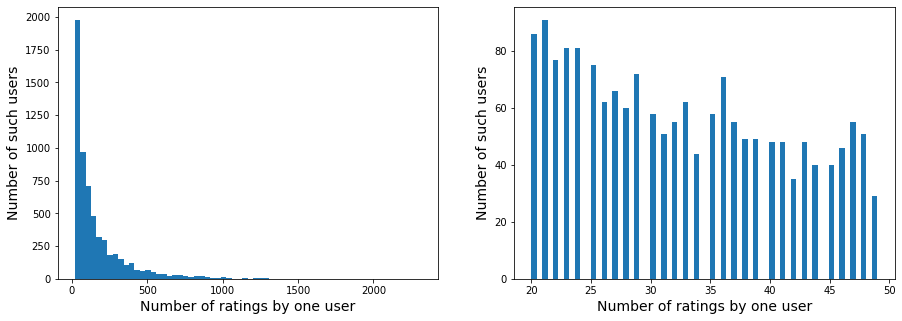

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axes[0])
plt.hist([len(user_ratings) for user_ratings in ratings], bins=64)
plt.xlabel('Number of ratings by one user', fontsize=14)
plt.ylabel('Number of such users', fontsize=14)

plt.sca(axes[1])
plt.hist([len(user_ratings) for user_ratings in ratings if len(user_ratings) < 50], bins=64)
plt.xlabel('Number of ratings by one user', fontsize=14)
plt.ylabel('Number of such users', fontsize=14)

print('Все пользователи в датасете сделали хотя бы по 20 оценок')

Но на момент времени, разделяющий обучающую и валидационную выборку 600 пользователей не сделали ни одной оценки


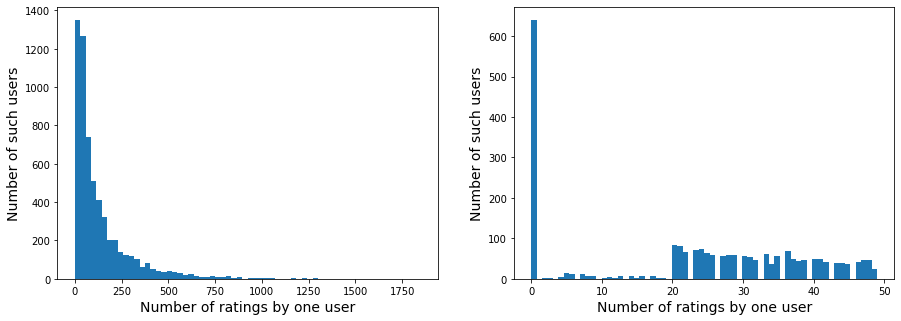

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axes[0])
plt.hist([len(user_ratings) for user_ratings in train_by_user.values()], bins=64)
plt.xlabel('Number of ratings by one user', fontsize=14)
plt.ylabel('Number of such users', fontsize=14)

plt.sca(axes[1])
plt.hist([len(user_ratings) for user_ratings in train_by_user.values() if len(user_ratings) < 50], bins=64)
plt.xlabel('Number of ratings by one user', fontsize=14)
plt.ylabel('Number of such users', fontsize=14)

print("Но на момент времени, разделяющий обучающую и валидационную выборку "
      "600 пользователей не сделали ни одной оценки")

In [33]:
movie_rates_cnt = {i: 0 for i in range(len(movies))}
for user_ratings in ratings:
    for rating in user_ratings:
        movie_rates_cnt[rating[0]] += 1

175 фильмов не имеют ни одной оценки


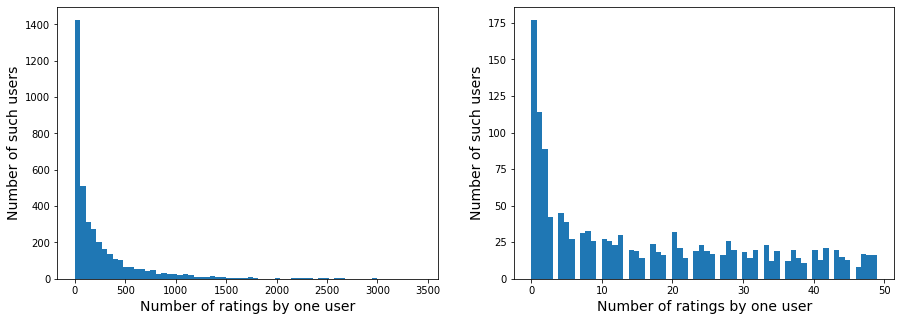

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axes[0])
plt.hist([i for i in movie_rates_cnt.values()], bins=64)
plt.xlabel('Number of ratings by one user', fontsize=14)
plt.ylabel('Number of such users', fontsize=14)

plt.sca(axes[1])
plt.hist([i for i in movie_rates_cnt.values() if i < 50], bins=64)
plt.xlabel('Number of ratings by one user', fontsize=14)
plt.ylabel('Number of such users', fontsize=14)

print("175 фильмов не имеют ни одной оценки")

Простейшее решение cold start problem: для новых пользователей предлагаем просто самые популярные фильмы (popularity-based approach).

In [36]:
# считаем средний рейтинг каждого фильма
movies_rating = defaultdict(list)
for u, i, r in train:
    movies_rating[i].append(r)
for mid in range(len(movies)):
    movies_rating[mid] = sum(movies_rating[mid]) / (len(movies_rating[mid]) + 1e-6)
movies_rating = np.array([movies_rating[mid] for mid in range(len(movies))])

In [37]:
def item_based_recoms_with_popularity_based_cold_start(uid):
    user_ratings = train_by_user[uid]
    if len(user_ratings) == 0:
        return movies_rating
    user_rated_items = [e[0] for e in user_ratings]
    user_rated_ratings = np.array([[e[1]] for e in user_ratings])
    # столбцы в матрице похожести, которые соответствуют оцененным фильмам
    similar_items = item_item_similarity[:, user_rated_items]
    # смешаем пользовательские рейтинги с весами похожести фильмов и таким образом получим предсказанные рейтинги
    recoms = similar_items.dot(user_rated_ratings)[:, 0] / (similar_items.sum(axis=1) + 1e-6)
    return recoms

In [38]:
recom_mse(item_based_recoms_with_popularity_based_cold_start)

0.03804089438208653

Видим, что даже такой простой трюк значительно улучшает MSE.

### ALS факторизация

В этом подходе оценка $r_{ui}$ пользователя $u$, поставленная фильму $i$, ищется как скалярное произведение векторов $p_u$ и $q_i$ в некотором пространстве $\mathbb{R}^K$ латентных признаков:

$$
	\hat{r}_{ui} = p_u^T q_i 
$$


Иными словами, модель находит пространство признаков, в котором мы описываем и фильмы и пользователей и в котором рейтинг является мерой близости между фильмами и пользователями.
	
Для настройки модели будем минимизировать следующую ошибку:
	$$
	\sum_{(u, i, r_{ui})} (r_{ui} - p_u^T q_i)^2 + \lambda_{p} p_u^T p_u + \lambda_{q} q_i^T q_i,
	$$
	где суммирование ведется по всем тройкам $(u, i, r_{ui})$ выборки, слагаемые с $\lambda_{p}$ и $\lambda_{q}$ добавлены для регуляризации.


In [68]:
LATENT_SIZE = 10

# регуляризаторы
lambda_p = 0.2
lambda_q = 0.001



Рассмотрим работу алгоритма ALS, продолжая работать с данными Movielens.

Посчитаем количество пользователей и фильмов

In [69]:
n_users = max([e[0] for e in train]) + 1
n_items = max([e[1] for e in train]) + 1

Инициализируем латентные представления для пользователей

In [70]:
p = 0.1 * np.random.random((n_users, LATENT_SIZE))
q = 0.1 * np.random.random((n_items, LATENT_SIZE))

Составим словарь взаимодействий по фильму

In [71]:
train_by_item = defaultdict(list)
for u, i, r in train:
    train_by_item[i].append((u, r))

Теперь составим матрицу $P$ из векторов $p_u$ и матрицу $Q$ из векторов $q_i$. Матрицей $Q[u] \in \mathbb{R}^{n_u \times K}$ будем обозначать подматрицу матрицы $Q$ только для товаров, оцененных пользователем $u$, где $n_u$ - количество оценок пользователя $u$.
	
Шаг перенастройки $p_u$ при фиксированной матрице $Q$ сводится к настройке ridge-регрессии и выглядит так:
	$$
	A_u = Q[u]^T Q[u] \\
	d_u = Q[u]^T r_u \\
	p_u = (\lambda_p n_u I + A_u)^{-1} d_u
	$$

In [73]:
def compute_p(p, q, train_by_user):
    for u, rated in train_by_user.items():
        rated_items = [i for i, _ in rated]
        rated_scores = np.array([r for _, r in rated])
        Q = q[rated_items, :]
        A = (Q.T).dot(Q)
        d = (Q.T).dot(rated_scores)
        p[u, :] = np.linalg.solve(lambda_p * (len(rated_items) + 1e-6) * np.eye(LATENT_SIZE) + A, d)
    return p

p = compute_p(p, q, train_by_user)

In [74]:
p.shape

(6040, 10)


Формулы для обновления $q_i$ при фиксированной матрице $P$ выглядят аналогично, реализация будет выглядеть следующим образом:


In [75]:
def compute_q(p, q, train_by_item):
    for i, rated in train_by_item.items():
        rated_users = [j for j, _ in rated]
        rated_scores = np.array([s for _, s in rated])
        P = p[rated_users, :]
        A = (P.T).dot(P)
        d = (P.T).dot(rated_scores)
        q[i, :] = np.linalg.solve(lambda_q * (len(rated_users) + 1e-6) * np.eye(LATENT_SIZE) + A, d)
    return q

q = compute_q(p, q, train_by_item)

In [76]:
q.shape

(3883, 10)

Теперь мы можем сделать предсказание всей матрицы оценок

In [77]:
predictions = p.dot(q.T)

Качество работы модели будем определять по среднеквадратичной ошибке между рейтингом и предсказанием

In [78]:
def train_error(predictions):
    return np.mean([(predictions[u, i] - r) ** 2 for u, i, r in train])

def test_error(predictions):
    return np.mean([(predictions[u, i] - r) ** 2 for u, i, r in test])

Теперь полностью реализуем метод: в ALS проводятся $N$ итераций, в рамках каждой сначала оптимизируется $p$ при фиксированном $q$, затем $q$ при фиксированном $p$.

In [79]:
%%time
N_ITER = 20
for iter in range(N_ITER):
    p = compute_p(p, q, train_by_user)
    q = compute_q(p, q, train_by_item)

    predictions = p.dot(q.T)
    
    print(iter, train_error(predictions), test_error(predictions))

0 0.030678527902685937 0.29085313748707314
1 0.027044608764448322 0.2902554271853627
2 0.025718264429761578 0.2902045638938193
3 0.025179595823558103 0.2901798493647741
4 0.024925351374386825 0.29013913142282965
5 0.024786064175864445 0.2900989100163742
6 0.02470274610426545 0.29006574466783824
7 0.024650249443137335 0.29003908801655703
8 0.024616137897834373 0.2900171585023377
9 0.024593613824612226 0.28999813464134
10 0.024578637235363913 0.2899812719555835
11 0.024568700040971145 0.28996640693780673
12 0.02456220421763892 0.2899534004381164
13 0.024558104305538366 0.28994206047591964
14 0.02455570004967073 0.28993216588025367
15 0.024554509944863603 0.28992350256596183
16 0.024554193806139185 0.28991588330249884
17 0.024554505496910364 0.28990915200633266
18 0.02455526351283658 0.28990318081229793
19 0.0245563321610292 0.2898978650238666
CPU times: user 1min 25s, sys: 1.33 s, total: 1min 27s
Wall time: 26.8 s


## Мораль
1. Простую рекомендательную систему построить просто.
2. Она будет работать не супер.
   1. Чтобы стало лучше надо смотреть на данные, думать, стоить более сложные модели и комбинировать простые.
3. Cold start problem возникает как по объектам, так и по пользователям. Надо думать как её решать.
4. Если данные разрежены (в рекомендательных системах это так) - используй разреженные матрицы.
5. Валидация модели обязательна.
   1. Обычно наиболее правильный способ разделять выборку - по времени.
   2. MSE - не очень информативная метрика качества модели. Лучше выбрать другую, более релевантную задаче.
6. Несмотря на то, что MSE - плохая метрика, матричные разложения, основанные на ней, работают на удивление хорошо.

## Что дальше?
Дальше можно:
1. Реализовать другие метрики качества для моделей.
2. Сравнить item-based и user-based модели.
   1. Проверить другие меры похожести.
3. Использовать content-based подход для решения cold start problem.
4. Переписать весь код выше с плотных матриц на разреженные.
5. Построить комбинацию из всех известных подходов.
6. Учитывать время отзыва.
   1. Мотивация: чем больше времени прошло с момента отзыва, тем больше успел измениться человек и тем меньше тот отзыв отражает текущие предпочтения этого человека.
   2. Идея: использовать величину, убывающую с давностью отзыва как вес в ALS.
7. (место для вашего творчества)